In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates

import xarray as xr
import cartopy.crs as ccrs
ds = xr.load_dataset('../../data/fluxes_all_cruises_compilation.nc')


In [2]:
ds

<xarray.Dataset>
Dimensions:  (time: 24908)
Coordinates:
  * time     (time) datetime64[ns] 1991-11-22T11:41:00.384000 ... NaT
Data variables: (12/55)
    jdyx     (time) float64 326.5 326.6 326.6 326.7 ... 106.8 106.9 106.9 107.0
    ushp     (time) float64 5.0 1.0 1.0 1.0 1.0 4.0 ... nan nan nan nan nan nan
    U        (time) float64 8.6 7.0 7.4 7.3 6.8 5.7 ... nan nan nan nan nan nan
    dir      (time) float64 67.0 97.0 103.0 108.0 108.0 ... nan nan nan nan nan
    urel     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    reldir   (time) float64 317.0 85.0 94.0 95.0 97.0 ... nan nan nan nan nan
    ...       ...
    rlcler   (time) float64 387.5 384.7 387.1 391.0 390.8 ... nan nan nan nan
    Rscl     (time) float64 0.0 0.0 0.0 411.8 941.5 ... nan nan nan nan nan
    rnl      (time) float64 50.84 60.7 60.7 55.47 22.12 ... nan nan nan nan nan
    hnet     (time) float64 -213.8 -200.7 -183.2 162.4 317.0 ... nan nan nan nan
    year     (time) float64 1.991e+03 1.991e+03 1.991e+03 ... nan nan nan
    pcode    (time) float64 77.0 77.0 77.0 77.0 77.0 ... nan nan nan nan nan

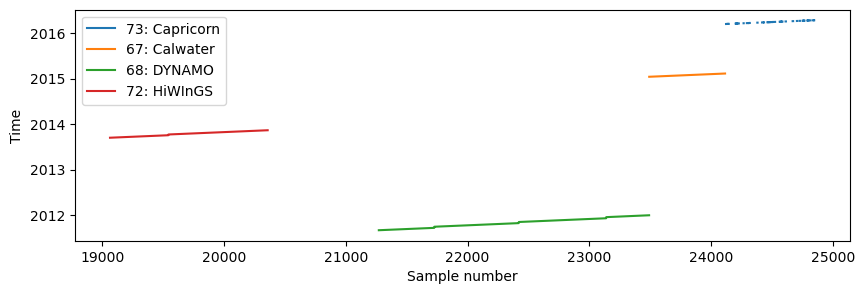

In [61]:
plt.figure(figsize=[10,3])
pcodes = {'77':'Metz', '69':'Epic', '87':'WHOTS', '83':'STRATUS',
          '78':'NEAQS', '72':'HiWInGS', '71':'GasEx', '68':'DYNAMO', '67':'Calwater', '73':'Capricorn'}
plt.plot(ds.time.where(ds.pcode==73), label='73: Capricorn')
plt.plot(ds.time.where(ds.pcode==67), label='67: Calwater')
plt.plot(ds.time.where(ds.pcode==68), label='68: DYNAMO')
plt.plot(ds.time.where(ds.pcode==72), label='72: HiWInGS')
# plt.plot(ds.time.where(ds.pcode==87), label='87: WHOTS')
# plt.plot(ds.time.where(ds.pcode==78), label='78: NEAQS')
# plt.plot(ds.time.where(ds.pcode==83), label='83: STRATUS')
# plt.plot(ds.time.where(ds.pcode==69), label='69: Epic')
# plt.plot(ds.time.where(ds.pcode==77), label='77: Metz')
plt.xlabel('Sample number')
plt.ylabel('Time')
plt.legend()

In [6]:
basepath = '/Users/jwu/Work/Dabble/Waves/'
YR = 2015
# Jan
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g01.nc' %YR
ds1 = xr.open_dataset(file,chunks={'time':'500MB'})
# Feb
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g02.nc' %YR
ds2 = xr.open_dataset(file,chunks={'time':'500MB'})

ds_ERA5 = xr.concat([ds1,ds2], dim="time")

In [7]:
ds_ERA5

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 323, time: 472)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * latitude   (latitude) float32 -78.0 -77.5 -77.0 -76.5 ... 82.0 82.5 83.0
  * time       (time) datetime64[ns] 2015-01-01 ... 2015-02-28T21:00:00
Data variables: (12/86)
    MAPSTA     (time, latitude, longitude) int16 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    dpt        (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    ucur       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    vcur       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    uwnd       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    vwnd       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    ...         ...
    vabr       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    uubr       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    vubr       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    mssu       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    mssc       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    mssd       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
Attributes: (12/102)
    WAVEWATCH_III_version_number:     7.00
    WAVEWATCH_III_switches:           F90 NOGRB NC4 SCRIP SCRIPNC SHRD PR3 UQ...
    SIN4 namelist parameter BETAMAX:  1.75
    title:                            WAVEWATCH-III HINDCAST
    netcdf_version:                   4.5.2
    product_name:                     LOPS_WW3-GLOB-30M_201501.nc
    ...                               ...
    P2SF:                             1
    E3D:                              1
    I1P2SF:                           3
    I2P2SF:                           24
    start_date:                       2015-01-01 00:00:00
    stop_date:                        2015-01-31 21:00:00

/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.

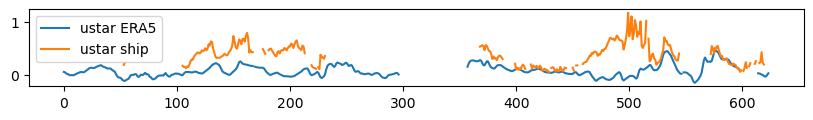

In [28]:
fig = plt.figure(figsize=[10,1])
ds_ERA5_flat = ds_ERA5.isel(time=0).stack(spacedim=('longitude','latitude'))
# plt.plot(ds_ERA5_flat.uust[:index])
# plt.plot(ds_ERA5_flat.vust[:index])
# plt.plot(ds_ERA5_flat.utaw[:index]**0.5/ds_ERA5_flat.uust[:index])
# plt.plot(ds_ERA5_flat.utwa[:index])

ds_cw = ds.where(ds.pcode==67, drop=True)
time_masked = ds_cw.time
ustar_ERA5_t = []; vstar_ERA5_t = []

for i in range(0,len(time_masked)):
    t = time_masked.values[i] # Can a get a unique index here?
    U = ds.U.sel(time=t)
    ti = ds.time.sel(time=t).values; 
    loni = ds.lon.sel(time=t).values; 
    lati = ds.lat.sel(time=t).values; 
    ustar_ERA5 = ds_ERA5.uust.interp(time=ti,longitude=loni,latitude=lati)
    vstar_ERA5 = ds_ERA5.vust.interp(time=ti,longitude=loni,latitude=lati)
    ustar_ERA5_t.append(ustar_ERA5); vstar_ERA5_t.append(vstar_ERA5)
   
plt.plot(ustar_ERA5_t, label='ustar ERA5')
plt.plot(ds_cw.taucx[:]**0.5, label='ustar ship')
# plt.plot(ds_cw.taucy[:]**0.5, label='taucy')
plt.legend()

Text(0, 0.5, '$u_*$ (m/s)')

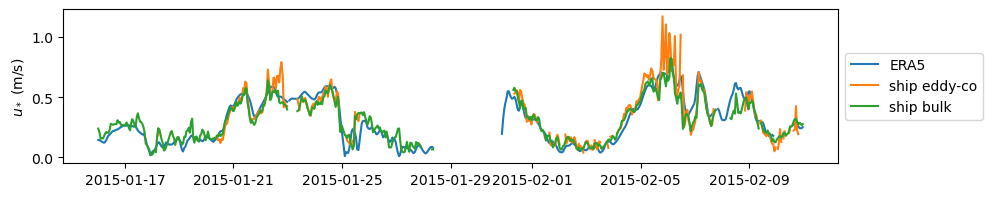

In [43]:
fig = plt.figure(figsize=[10,2])
Ustar_ERA5_t = (np.array(ustar_ERA5_t)**2 + np.array(vstar_ERA5_t)**2)**0.5
plt.plot(time_masked, Ustar_ERA5_t, label=r'ERA5')
plt.plot(time_masked, ds_cw.taucx[:]**0.5, label=r'ship eddy-co')
# plt.plot(time_masked, ds_cw.tauib[:]**0.5, label=r'ship inertial-diss')
plt.plot(time_masked, ds_cw.taub[:]**0.5, label=r'ship bulk')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('$u_*$ (m/s)')

In [44]:
time_masked

<xarray.DataArray 'time' (time: 624)>
array(['2015-01-16T00:24:59.990400000', '2015-01-16T01:30:00.000000000',
       '2015-01-16T02:30:00.028800000', ..., '2015-02-10T21:24:59.990400000',
       '2015-02-10T22:30:00.000000000', '2015-02-10T23:30:00.028800000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T00:24:59.990400 ... 2015-02-10T...

(0.0, 400.0)

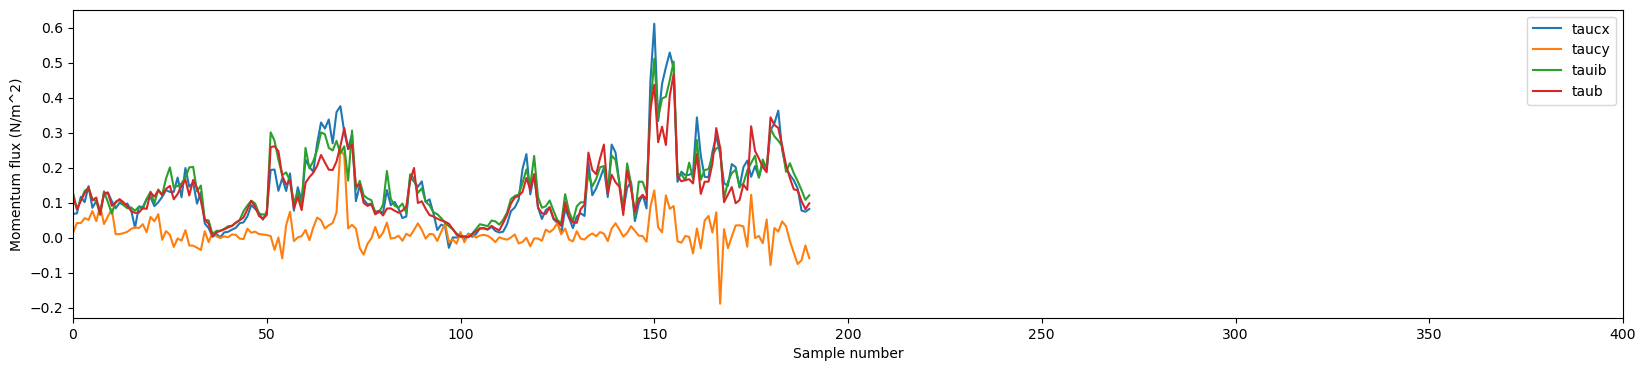

In [5]:
fig = plt.figure(figsize=[20,4])
ds_cw = ds.where(ds.pcode==73, drop=True)
i1 = 400

plt.plot(ds_cw.taucx[:], label='taucx')
plt.plot(ds_cw.taucy[:], label='taucy')
plt.plot(ds_cw.tauib[:], label='tauib')
plt.plot(ds_cw.taub[:], label='taub')

uERA5_t = []
vERA5_t = []
UERA5_t = []
for i in range(0,len(time_masked)):
    t = time_masked.values[i] # Can a get a unique index here?
    U = ds.U.sel(time=t)
    ti = ds.time.sel(time=t).values; 
    loni = ds.lon.sel(time=t).values; 
    lati = ds.lat.sel(time=t).values; 
    uERA5 = ds_ERA5.uwnd.interp(time=ti,longitude=loni,latitude=lati)
    vERA5 = ds_ERA5.vwnd.interp(time=ti,longitude=loni,latitude=lati)
    UERA5 = (uERA5**2 + vERA5**2)**0.5
    uERA5_t.append(uERA5); vERA5_t.append(vERA5); UERA5_t.append(UERA5)



plt.xlabel('Sample number')
plt.ylabel('Momentum flux (N/m^2)')
plt.legend()
plt.xlim([0,i1])

(0.0, 400.0)

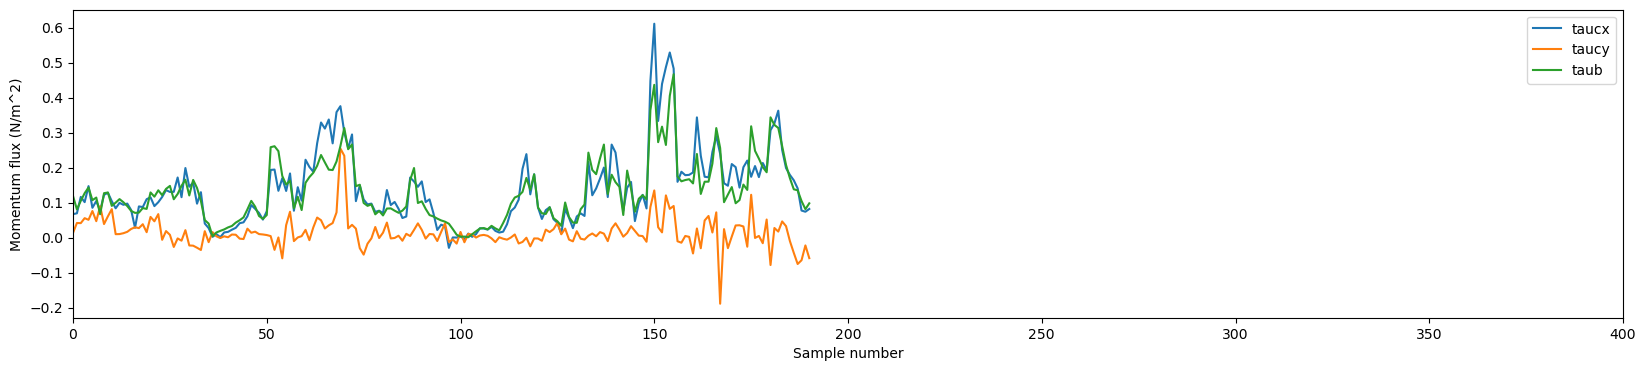

In [151]:
fig = plt.figure(figsize=[20,4])
ds_cw = ds.where(ds.pcode==73, drop=True)
i1 = 400
plt.plot(ds_cw.taucx[:], label='taucx')
plt.plot(ds_cw.taucy[:], label='taucy')
plt.plot(ds_cw.taub[:], label='taub')
# plt.plot(ds.hsc[:i], '--', label='hsc')
# plt.plot(ds.hsib[:i], '--', label='hsib')
# plt.plot(ds.hsb[:i], '--', label='hsb')
plt.xlabel('Sample number')
plt.ylabel('Momentum flux (N/m^2)')
plt.legend()
plt.xlim([0,i1])



In [150]:
(0.007/1.293)**0.5

0.07357830138463449

(0.0, 4000.0)

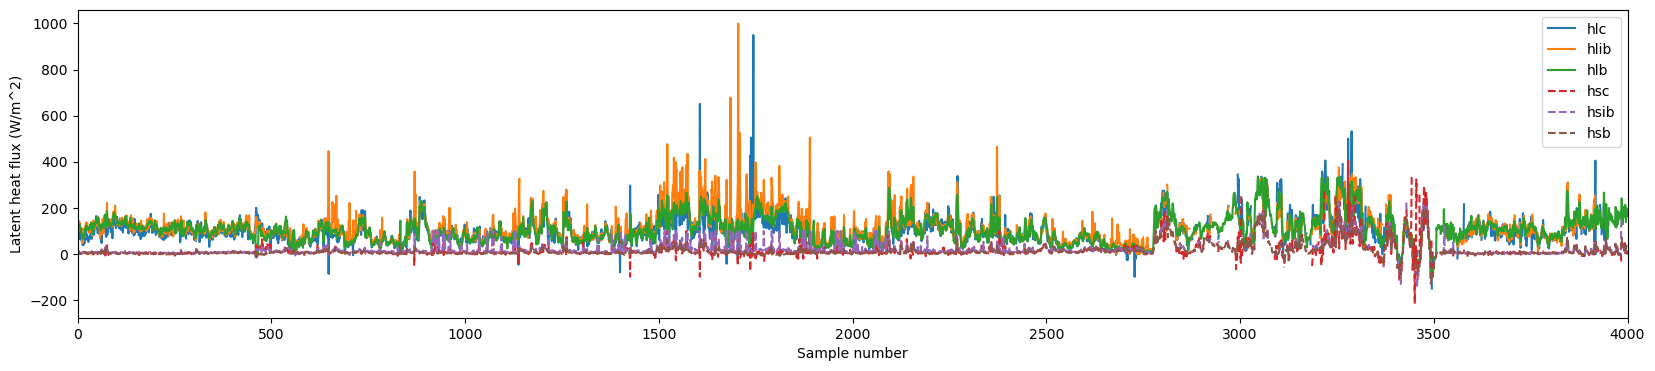

In [27]:
fig = plt.figure(figsize=[20,4])
i = 4000
plt.plot(ds.hlc[:i], label='hlc')
plt.plot(ds.hlib[:i], label='hlib')
plt.plot(ds.hlb[:i], label='hlb')
plt.plot(ds.hsc[:i], '--', label='hsc')
plt.plot(ds.hsib[:i], '--', label='hsib')
plt.plot(ds.hsb[:i], '--', label='hsb')
plt.xlabel('Sample number')
plt.ylabel('Latent heat flux (W/m^2)')
plt.legend()
plt.xlim([0,i])

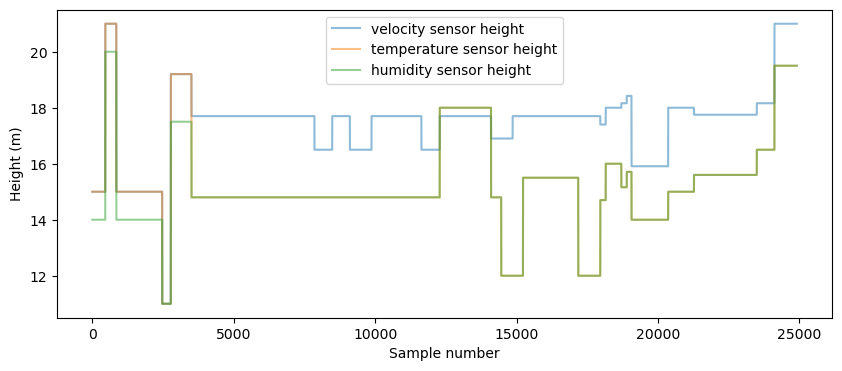

In [16]:
fig = plt.figure(figsize=[10,4])
plt.plot(ds.zu[:], label='velocity sensor height', alpha = 0.5)
plt.plot(ds.zt[:], label='temperature sensor height', alpha = 0.5)
plt.plot(ds.zq[:], label='humidity sensor height', alpha = 0.5)
plt.xlabel('Sample number')
plt.ylabel('Height (m)')
plt.legend()

In [ ]:
# ct=x(:,28);%ct^2 (K^2/m^.667)
# cq=x(:,29);%cq^2 ((g/kg)^2/m^.667)
# cu=x(:,30);%cu^2 ((m/s)^2/m^.667)
# cw=x(:,31);%cw^2 ((m/s)^2/m^.667)

# Let's check if the bulk calculation is what we think it is

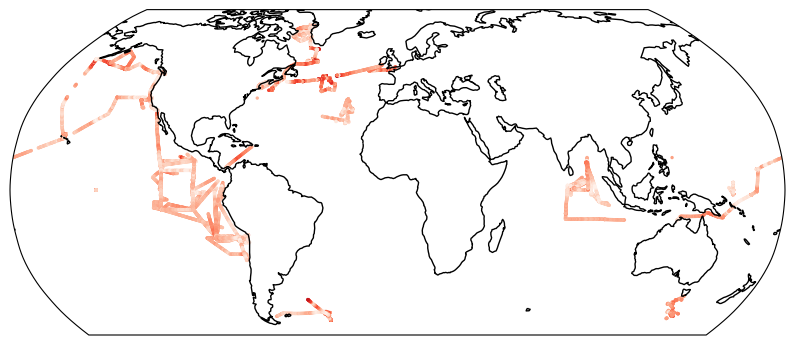

In [42]:
# I wanted to make a plot that shows trajectory in space time and color coded by the quantity of interest
pcodes = {'77':'Metz', '69':'Epic', '87':'WHOTS', '83':'STRATUS',
          '78':'NEAQS', '72':'HiWInGS', '71':'GasEx', '68':'DYNAMO', '67':'Calwater', '73':'Capricorn'}

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
# ax.set_global()
ax.coastlines()
colors = cm.tab10(np.linspace(0, 1, 10))

U_ = ds.U.values[~np.isnan(ds.U.values)]
U_.max()

for i, p in enumerate(np.unique(ds.pcode.dropna(dim='time'))):
    idx = ds.pcode == p
    pcode = pcodes[str(int(p))]
    cs = ax.scatter(ds.lon[idx], ds.lat[idx],
                    s=2, color=plt.get_cmap('Reds')(ds.U[idx]/U_.max()), transform=ccrs.PlateCarree())


['2011-09-03T00:24:59.904000000' '2011-09-03T01:30:00.000000000'
 '2011-09-03T02:30:00.115200000' ... '2011-12-31T21:24:59.904000000'
 '2011-12-31T22:30:00.000000000' '2011-12-31T23:30:00.115200000']


/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


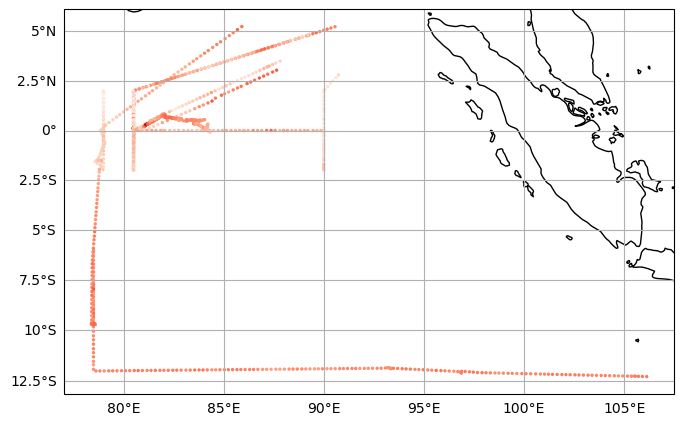

In [138]:
# I wanted to make a plot that shows trajectory in space time and color coded by the quantity of interest
pcodes = {'77':'Metz', '69':'Epic', '87':'WHOTS', '83':'STRATUS',
          '78':'NEAQS', '72':'HiWInGS', '71':'GasEx', '68':'DYNAMO', '67':'Calwater', '73':'Capricorn'}

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# ax.set_global()
ax.coastlines()
colors = cm.tab10(np.linspace(0, 1, 10))

idx = ds.pcode == 68
U_ = ds.U.values[idx]
U_ = U_[~np.isnan(U_)]
pcode = pcodes[str(int(p))]
cs = ax.scatter(ds.lon[idx], ds.lat[idx],
                s=2, color=plt.get_cmap('Reds')(ds.U[idx]/U_.max()), transform=ccrs.PlateCarree())
print(ds.time.values[idx])
gl = ax.gridlines()
gl.xlabels_bottom = True
gl.ylabels_left = True

In [108]:
time_masked = ds.time.where(ds.pcode==67, drop=True)
uERA5_t = []
vERA5_t = []
UERA5_t = []
for i in range(0,len(time_masked)):
    t = time_masked.values[i] # Can a get a unique index here?
    U = ds.U.sel(time=t)
    ti = ds.time.sel(time=t).values; 
    loni = ds.lon.sel(time=t).values; 
    lati = ds.lat.sel(time=t).values; 
    uERA5 = ds_ERA5.uwnd.interp(time=ti,longitude=loni,latitude=lati)
    vERA5 = ds_ERA5.vwnd.interp(time=ti,longitude=loni,latitude=lati)
    UERA5 = (uERA5**2 + vERA5**2)**0.5
    uERA5_t.append(uERA5); vERA5_t.append(vERA5); UERA5_t.append(UERA5)

/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.

/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.values)


Text(0, 0.5, 'Wind speed')

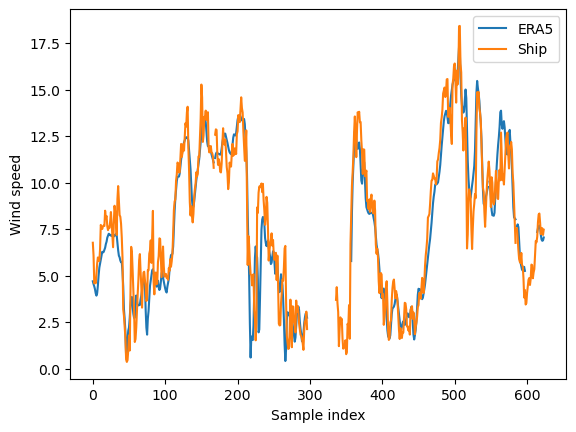

In [117]:
plt.plot(UERA5_t, label='ERA5')
plt.plot(ds.U.where(ds.pcode==67, drop=True), label='Ship')
plt.legend()
plt.xlabel('Sample index')
plt.ylabel('Wind speed')

Text(0, 0.5, 'Longitude')

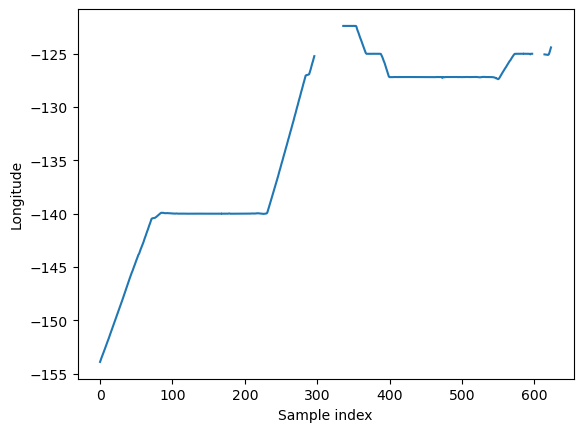

In [131]:
# plt.plot(ds.U.where(ds.pcode==67, drop=True), label='Ship')
# plt.plot(ds.lat.where(ds.pcode==67, drop=True), label='Ship')
plt.plot(ds.lon.where(ds.pcode==67, drop=True), label='Ship')
# plt.legend()
plt.xlabel('Sample index')
plt.ylabel('Longitude')

In [124]:
ds.time.where(ds.pcode==67, drop=True)

<xarray.DataArray 'time' (time: 624)>
array(['2015-01-16T00:24:59.990400000', '2015-01-16T01:30:00.000000000',
       '2015-01-16T02:30:00.028800000', '2015-01-16T03:24:59.990400000',
       '2015-01-16T04:30:00.000000000', '2015-01-16T05:30:00.028800000',
       '2015-01-16T06:24:59.990400000', '2015-01-16T07:30:00.000000000',
       '2015-01-16T08:30:00.028800000', '2015-01-16T09:24:59.990400000',
       '2015-01-16T10:30:00.000000000', '2015-01-16T11:30:00.028800000',
       '2015-01-16T12:24:59.990400000', '2015-01-16T13:30:00.000000000',
       '2015-01-16T14:30:00.028800000', '2015-01-16T15:24:59.990400000',
       '2015-01-16T16:30:00.000000000', '2015-01-16T17:30:00.028800000',
       '2015-01-16T18:24:59.990400000', '2015-01-16T19:30:00.000000000',
       '2015-01-16T20:30:00.028800000', '2015-01-16T21:24:59.990400000',
       '2015-01-16T22:30:00.000000000', '2015-01-16T23:30:00.028800000',
       '2015-01-17T00:24:59.990400000', '2015-01-17T01:30:00.000000000',
       '2015-01-17T02:30:00.028800000', '2015-01-17T03:24:59.990400000',
       '2015-01-17T04:30:00.000000000', '2015-01-17T05:30:00.028800000',
       '2015-01-17T06:24:59.990400000', '2015-01-17T07:30:00.000000000',
       '2015-01-17T08:30:00.028800000', '2015-01-17T09:24:59.990400000',
       '2015-01-17T10:30:00.000000000', '2015-01-17T11:30:00.028800000',
       '2015-01-17T12:24:59.990400000', '2015-01-17T13:30:00.000000000',
       '2015-01-17T14:30:00.028800000', '2015-01-17T15:24:59.990400000',
...
       '2015-02-09T10:30:00.000000000', '2015-02-09T11:30:00.028800000',
       '2015-02-09T12:24:59.990400000', '2015-02-09T13:30:00.000000000',
       '2015-02-09T14:30:00.028800000', '2015-02-09T15:24:59.990400000',
       '2015-02-09T16:30:00.000000000', '2015-02-09T17:30:00.028800000',
       '2015-02-09T18:24:59.990400000', '2015-02-09T19:30:00.000000000',
       '2015-02-09T20:30:00.028800000', '2015-02-09T21:24:59.990400000',
       '2015-02-09T22:30:00.000000000', '2015-02-09T23:30:00.028800000',
       '2015-02-10T00:24:59.990400000', '2015-02-10T01:30:00.000000000',
       '2015-02-10T02:30:00.028800000', '2015-02-10T03:24:59.990400000',
       '2015-02-10T04:30:00.000000000', '2015-02-10T05:30:00.028800000',
       '2015-02-10T06:24:59.990400000', '2015-02-10T07:30:00.000000000',
       '2015-02-10T08:30:00.028800000', '2015-02-10T09:24:59.990400000',
       '2015-02-10T10:30:00.000000000', '2015-02-10T11:30:00.028800000',
       '2015-02-10T12:24:59.990400000', '2015-02-10T13:30:00.000000000',
       '2015-02-10T14:30:00.028800000', '2015-02-10T15:24:59.990400000',
       '2015-02-10T16:30:00.000000000', '2015-02-10T17:30:00.028800000',
       '2015-02-10T18:24:59.990400000', '2015-02-10T19:30:00.000000000',
       '2015-02-10T20:30:00.028800000', '2015-02-10T21:24:59.990400000',
       '2015-02-10T22:30:00.000000000', '2015-02-10T23:30:00.028800000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T00:24:59.990400 ... 2015-02-10T...